In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline

In [15]:
dataset = pd.read_csv('../modeldata/trythetaSTD.csv')

In [16]:
dataset

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,nearThetaSTD,EMcrossnear,EMcrossfar,EMcrossouter,prelimStable,Stable,instability_time,shadow_instability_time
0,0,2.049650,0.013679,0.234941,0.002188,0.974706,1.816432,0.221502,0.300893,0.589043,True,False,1.235665e+07,8.315223e+07
1,1,1.938160,0.076051,0.388864,0.001233,0.069950,1.836748,0.190647,0.403777,0.671403,True,False,1.348749e+05,2.133072e+05
2,2,1.997951,0.002335,0.141684,0.004603,0.999966,0.775818,0.125660,0.720557,0.936762,True,False,1.276428e+04,9.321863e+03
3,3,1.993565,0.004385,0.076984,0.000052,0.329016,0.620747,0.216684,0.235460,0.503164,True,True,1.000000e+09,1.000000e+09
4,4,NaN,NaN,NaN,NaN,0.121660,NaN,0.024455,0.034058,0.059346,False,False,8.791890e+01,8.791890e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138538,138538,2.008604,0.003245,3.814043,0.068524,0.026189,0.126759,0.082222,0.664222,0.801058,True,False,6.990387e+05,8.267916e+05
138539,138539,1.891461,0.041741,0.204071,0.000258,0.100165,0.468492,0.251338,0.272822,0.592730,True,False,3.075749e+08,6.576003e+08
138540,138540,2.099445,0.049722,0.563941,0.005761,0.996531,0.208790,0.131799,0.366664,0.546790,True,False,1.193822e+07,3.363291e+07
138541,138541,1.786383,0.089323,0.122812,0.000538,0.998344,0.479796,0.209454,0.395073,0.687277,True,False,2.064407e+08,4.316851e+07


In [17]:
def hasnull(row):
    numnulls = row.isnull().sum()
    if numnulls == 0:
        return 0
    else:
        return 1

def tmax(row):
    #sim = get_sim(row, csvfolder)
    tmax = 1e4 # replace with a calculation of tmax
    return tmax

In [18]:
%%time
if 'hasnull' not in dataset.columns:
    dataset['hasnull'] = dataset.apply(hasnull, axis=1)
    #dataset['tmax'] = dataset.apply(tmax, axis=1)
    # dataset['tmax'] = dataset.apply(lambda x:1e4, axis=1) # this version would just set tmax=1e4 for all of them

    #dataset.to_csv(trainingdatafolder+"trainingdata.csv", encoding='ascii')

CPU times: user 5.91 s, sys: 15.9 ms, total: 5.92 s
Wall time: 5.92 s


In [19]:
mask = (dataset['hasnull'] == 0 )
filtData = dataset[mask]

In [20]:
filtData

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,nearThetaSTD,EMcrossnear,EMcrossfar,EMcrossouter,prelimStable,Stable,instability_time,shadow_instability_time,hasnull
0,0,2.049650,0.013679,0.234941,0.002188,0.974706,1.816432,0.221502,0.300893,0.589043,True,False,1.235665e+07,8.315223e+07,0
1,1,1.938160,0.076051,0.388864,0.001233,0.069950,1.836748,0.190647,0.403777,0.671403,True,False,1.348749e+05,2.133072e+05,0
2,2,1.997951,0.002335,0.141684,0.004603,0.999966,0.775818,0.125660,0.720557,0.936762,True,False,1.276428e+04,9.321863e+03,0
3,3,1.993565,0.004385,0.076984,0.000052,0.329016,0.620747,0.216684,0.235460,0.503164,True,True,1.000000e+09,1.000000e+09,0
5,5,2.005946,0.003046,0.071558,0.000018,0.213067,1.814179,0.537356,0.568136,1.410783,True,True,1.000004e+09,1.000004e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138538,138538,2.008604,0.003245,3.814043,0.068524,0.026189,0.126759,0.082222,0.664222,0.801058,True,False,6.990387e+05,8.267916e+05,0
138539,138539,1.891461,0.041741,0.204071,0.000258,0.100165,0.468492,0.251338,0.272822,0.592730,True,False,3.075749e+08,6.576003e+08,0
138540,138540,2.099445,0.049722,0.563941,0.005761,0.996531,0.208790,0.131799,0.366664,0.546790,True,False,1.193822e+07,3.363291e+07,0
138541,138541,1.786383,0.089323,0.122812,0.000538,0.998344,0.479796,0.209454,0.395073,0.687277,True,False,2.064407e+08,4.316851e+07,0


In [21]:
import plotFunctions

In [30]:
plot = filtData

In [44]:
plot = filtData.drop(filtData[filtData['threeBRfillfac'] >20].index)
plot = plot.drop(plot[plot['nearThetaSTD']>2].index)
# plot = plot.drop(plot[plot['3/2_order']>70].index)
# plot = plot.drop(plot[plot['MMRstrengthnear']<.5].index)


In [24]:
import math
import numpy as np

In [25]:
import numpy as np
def plotfill(x):
    p1 = np.log10((x**(-1.5))*(1/(1-(x**(-1)))))
    p2 = math.sqrt(-np.log(1-(x**(-1))))
    return p1+p2

In [26]:
plotfill(1.1)

2.5278175491242747

In [27]:
fillList = np.linspace(1.0001,20,100000)
y = list(map(plotfill,fillList))
y = list(map(lambda x: x+5.5, y))

/tmp/ipykernel_30946/1357316262.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter((plot['threeBRfillfac']),np.log10(plot['instability_time']), s=2, c=((plot['nearThetaSTD'])), cmap=plt.cm.get_cmap("cool",10),alpha=1)


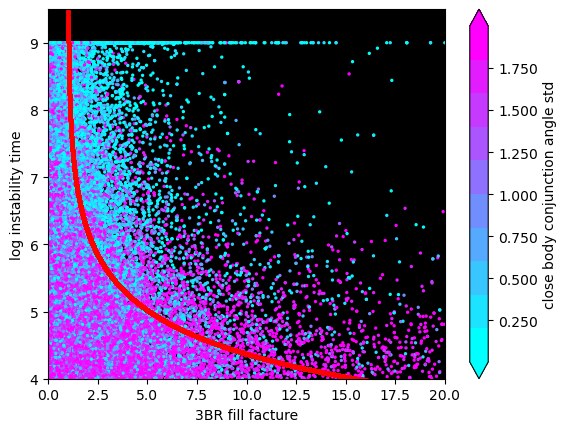

In [47]:
ax = plt.axes()
plt.scatter((plot['threeBRfillfac']),np.log10(plot['instability_time']), s=2, c=((plot['nearThetaSTD'])), cmap=plt.cm.get_cmap("cool",10),alpha=1)
cbar = plt.colorbar(orientation="vertical", extend="both",
                   pad=0.05, shrink=1, aspect=20, format="%.3f")

plt.scatter(fillList, y,s=4, c = 'red')
ax.set_xlim([0,20])
ax.set_ylim([4,9.5])
plt.xlabel("3BR fill facture")
plt.ylabel("log instability time")
cbar.set_label('close body conjunction angle std')
ax.set_facecolor("black")


/tmp/ipykernel_30946/63364479.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter((plot['nearThetaSTD']),np.log10(plot['instability_time']), s=2, c=(np.log10(plot['threeBRfillfac'])), cmap=plt.cm.get_cmap("cool",20),alpha=1)


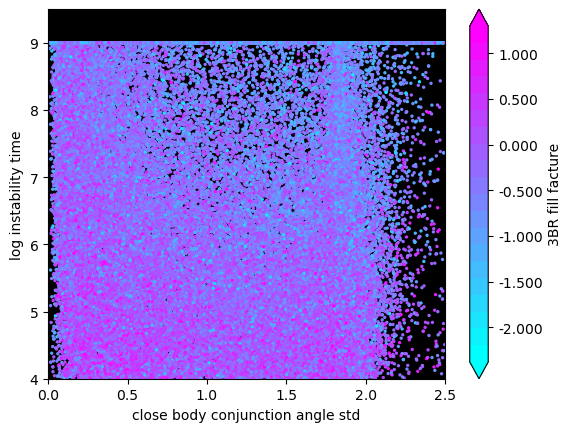

In [40]:
ax = plt.axes()
plt.scatter((plot['nearThetaSTD']),np.log10(plot['instability_time']), s=2, c=(np.log10(plot['threeBRfillfac'])), cmap=plt.cm.get_cmap("cool",20),alpha=1)
cbar = plt.colorbar(orientation="vertical", extend="both",
                   pad=0.05, shrink=1, aspect=20, format="%.3f")

#plt.scatter(fillList, y,s=4, c = 'red')
ax.set_xlim([0,2.5])
ax.set_ylim([4,9.5])
plt.xlabel('close body conjunction angle std')
plt.ylabel("log instability time")
cbar.set_label("3BR fill facture")
ax.set_facecolor("black")